In [1]:
import sys
import wrapper_pkg
import numpy as np
from IPython.display import display

Found translator module:  <module 'ops_translator.c.ops' from '/opt/conda/lib/python3.6/site-packages/ops_translator/c/ops.py'>


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Zeeman, 159154.94309644433, outside expected range [1.0e+00,1.0e+05]
Initialising simulation ...
Generated step kernel: 1.23 s


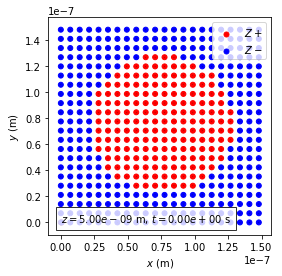

Running simulation ...
| 281000 energy_ratio: 9.68e-06 Elapsed Time: 1:10:50                          Simulation Complete: 280000 steps, 281 frames, 4263.07 s


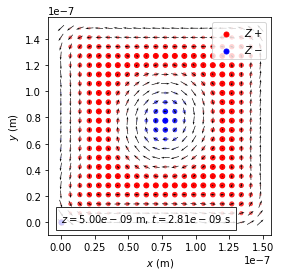

Rendering animation ...
100% (141 of 141) |#######################| Elapsed Time: 0:00:24 Time: 0:00:24


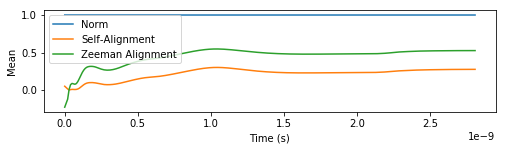

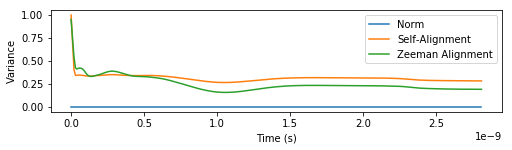

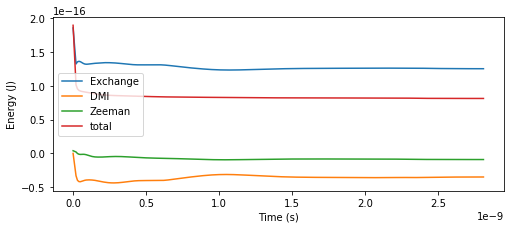

In [4]:
save_every = 1000
grid_params = wrapper_pkg.DimParams(l=[150e-9,150e-9,10e-9], d=1e-9)
time_params = wrapper_pkg.DimParams(d=1e-14, bounded=False)
sim_params = wrapper_pkg.SimParams(A=8.78e-12,
                             K=0,
                             D=1.58e-3,
                             Hmag= 0.2 / wrapper_pkg.sim.Sim.mu0,
                             Ms=384e3,
                             e=[1,0,0],
                             Hdir=[0,0,1],
                             alpha=0.5)

sim = wrapper_pkg.DevitoSim(sim_params, grid_params, time_params, save_every=save_every, 
                            periodic_boundary=False, correction=6, print_params=False)
sim.init_disk()
sim.plot(-1, grid_params.n[2] // 2, image_width=4, filename="skyrmion_flip_start.png")
sim.run(0.00001)
sim.plot(-1, grid_params.n[2] // 2, image_width=4, filename="skyrmion_flip_H_posz.png")
sim.animate(sim.grid_params.n[2] // 2, max_frames=240)
sim.plot_evolution()
sim.plot_energy()

Initialising simulation ...
Generated step kernel: 1.24 s
Running simulation ...
| 37000 energy_ratio: 8.31e-06 Elapsed Time: 0:08:37                           Simulation Complete: 36000 steps, 37 frames, 536.11 s


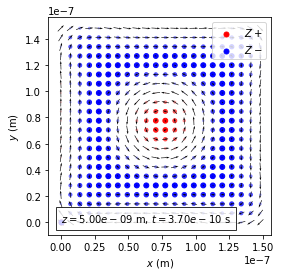

Rendering animation ...
100% (37 of 37) |#########################| Elapsed Time: 0:00:06 Time: 0:00:06


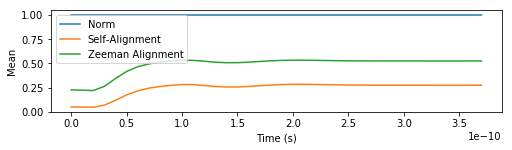

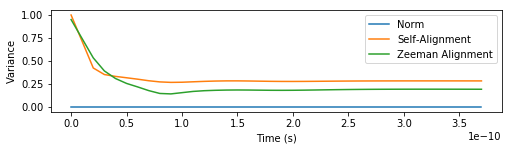

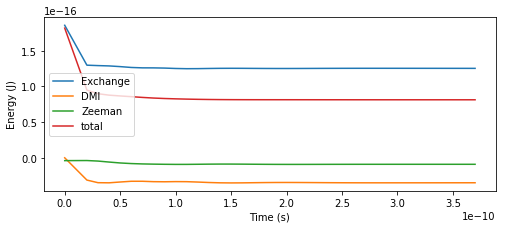

In [5]:
sim.need_generate_kernels = True
sim.sim_params.H = [-1 * H for H in sim.sim_params.H]
sim.init_disk()
sim.run(0.00001)
sim.plot(-1, grid_params.n[2] // 2, image_width=4, filename="skyrmion_flip_H_negz.png")
sim.animate(sim.grid_params.n[2] // 2, max_frames=240)
sim.plot_evolution()
sim.plot_energy()